In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('/home/yuliya/repos/cosybio/FedProt/evaluation_utils/')
from evaluation import evaluation_func as fp_eval

from collections import OrderedDict


In [2]:
color_dict = OrderedDict()

color_dict["Methods"] = OrderedDict({
    # "FedProt":"black",
    "DEqMS_corrected": "darkgreen",
})

In [3]:
dfs = {}

workdir = "/home/yuliya/repos/cosybio/FedProt/evaluation/batch_effects_eval/bacterial/results" 
df = fp_eval.read_results(
  workdir,
  corrected_deqms_name="/central_corrected_res.tsv",
  deqms_name="/central_res.tsv",
  fedprot_name="/DPE.csv",
  only_two = True)
dfs["Bacterial dataset"] = df
print(f"Proteins: {len(df)}")


workdir = "/home/yuliya/repos/cosybio/FedProt/evaluation/batch_effects_eval/TMT_data/results" 
df = fp_eval.read_results(
  workdir,
  corrected_deqms_name="/central_corrected_res.tsv",
  deqms_name="/central_res.tsv",
  fedprot_name="/DPE.csv",
  only_two = True)
dfs["Human serum dataset"] = df
print(f"Proteins: {len(df)}")

Results loaded for DEqMS with 2190 proteins.


Results loaded for FedProt with 2831 proteins.
Results loaded for DEqMS_corrected with 2190 proteins.
Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/batch_effects_eval/bacterial/results with 2190 genes. Adj.p-values were not log-transformed.
Results loaded for DEqMS with 320 proteins.
Results loaded for FedProt with 532 proteins.
Results loaded for DEqMS_corrected with 320 proteins.
Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/batch_effects_eval/TMT_data/results with 320 genes. Adj.p-values were not log-transformed.


Proteins: 2190
Proteins: 320


In [4]:
log_dfs = {}
for k in dfs:
    df = dfs[k]
    df = df.replace(0,1e-300)
    df["pv_DEqMS"] = -np.log10(df["pv_DEqMS"])
    for m in ["FedProt", "DEqMS_corrected"]:
        df["pv_"+m] = -np.log10(df["pv_"+m])
    log_dfs[k] = df

In [5]:
def simplified_plt_results(dfs, methods=["DEqMS_corrected"],
                           color="darkblue", what="pv_",
                           datasets=["Bacterial", "Human plasma"],
                           comparsions=["pyr/glu", "control/FSGS"],
                           figsize=(9, 4)):

    fig, axes = plt.subplots(1, len(datasets), figsize=figsize)

    for i, dataset in enumerate(datasets):
        df = dfs[dataset]
        x = np.abs(df[f'{what}DEqMS'].values)
        y = np.abs(df[f'{what}DEqMS_corrected'].values)

        axes[i].scatter(x, y, s=1, color=color, alpha=0.5)
        axes[i].set_xlabel(f'-log10(adj.p-val.), {comparsions[i]}\ncentralized DEqMS with factor\non uncorrected data')
        axes[i].set_ylabel(f'-log10(adj.p-val.), {comparsions[i]}\ncentralized DEqMS\non batch effects corrected using data')
        axes[i].set_title(f'{dataset}', fontsize=14)
        axes[i].plot([np.min(x), np.max(x)], [np.min(x), np.max(x)], 'r--', lw=0.5)

    plt.tight_layout()
    plt.show()

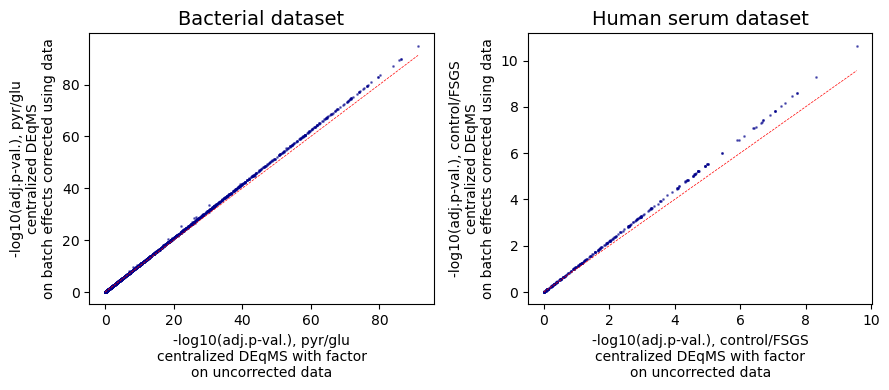

In [6]:
simplified_plt_results(
    log_dfs,
    datasets=["Bacterial dataset", "Human serum dataset"],
    comparsions=["pyr/glu", "control/FSGS"]
)

Plotting corrs using logFC values.


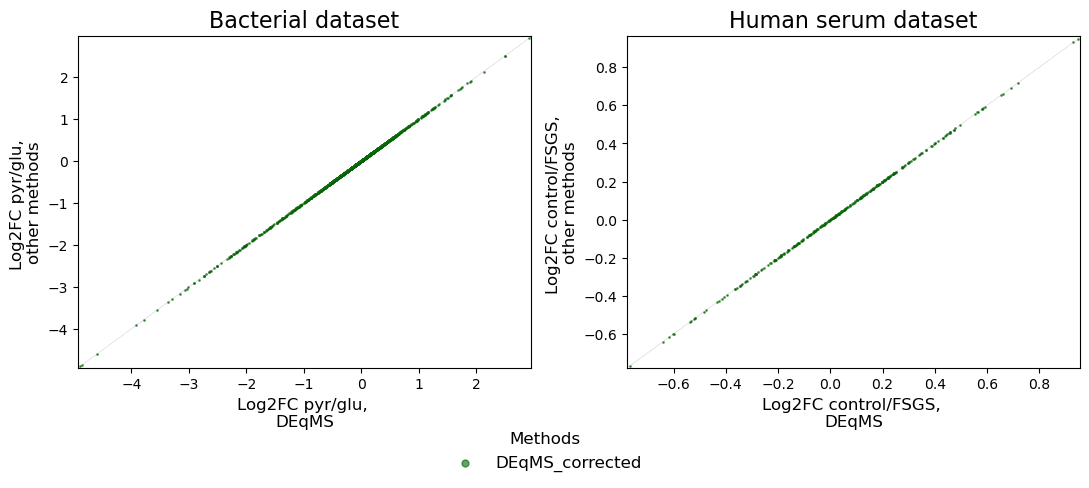

In [7]:
fp_eval.plt_results(
    log_dfs, 
    methods=["DEqMS_corrected"],
    color_dict=color_dict,
    what="lfc_", 
    text="", dotsize=1,
    datasets=list(log_dfs.keys()),
    add_table=False,
    sharex =False, sharey=False,
    comparsions=["pyr/glu", "control/FSGS"]
)

# plt.savefig("/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/plots/" + "Fig3B_prototype.png", dpi=1200)